In [73]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.linear_model import LinearRegression

housing_price_index = pd.read_csv('monthly-hpi.csv')
unemployment = pd.read_csv('unemployment-macro.csv')
federal_funds_rate = pd.read_csv('fed_funds.csv')
shiller = pd.read_csv('shiller.csv')
gross_domestic_product = pd.read_csv('gdp.csv')

# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date')
    .merge(unemployment, on='date')
    .merge(federal_funds_rate, on='date')
    .merge(gross_domestic_product, on='date'))

df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,1/1/2011,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,4/1/2011,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,7/1/2011,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,10/1/2011,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,1/1/2012,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


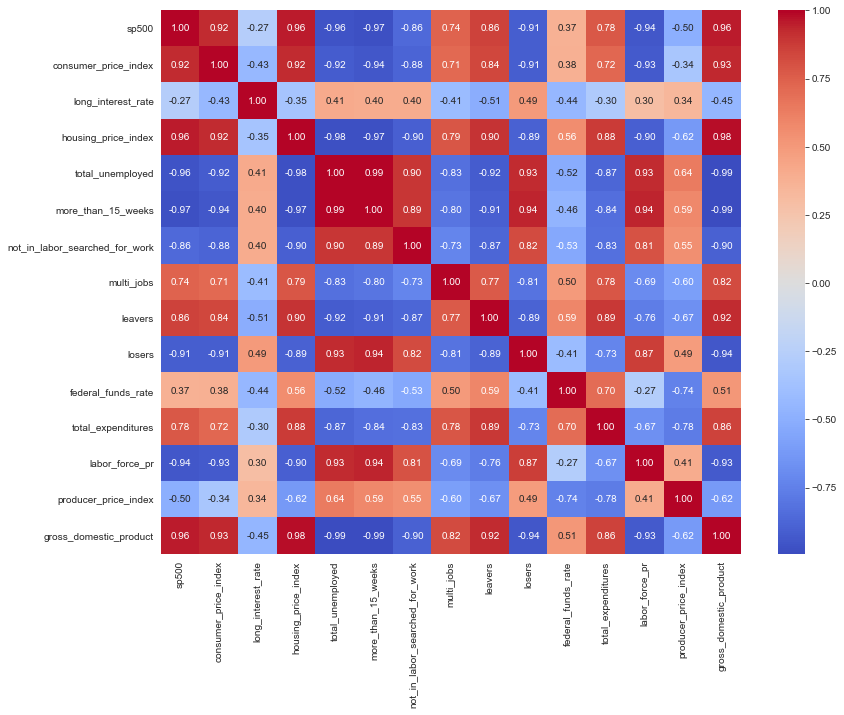

In [21]:

# Create tabular correlation matrix with data
corr = df.corr('pearson')
heat, ax = plt.subplots(figsize=(13,10))
# Plot correlation matrix
heat = sns.heatmap(corr, ax=ax, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap='coolwarm', annot =True, fmt= '.2f')


In [43]:
corr['housing_price_index']

sp500                             0.960468
consumer_price_index              0.923467
long_interest_rate               -0.353817
housing_price_index               1.000000
total_unemployed                 -0.975517
more_than_15_weeks               -0.972029
not_in_labor_searched_for_work   -0.903926
multi_jobs                        0.789606
leavers                           0.903842
losers                           -0.892854
federal_funds_rate                0.561913
total_expenditures                0.878971
labor_force_pr                   -0.904213
producer_price_index             -0.621928
gross_domestic_product            0.976960
Name: housing_price_index, dtype: float64

In [2]:
# ols method is a part of statsmodel library, remember to import
#all libraries prior to running this code
housing_model = ols("""housing_price_index ~ total_unemployed
 + long_interest_rate + federal_funds_rate
 + consumer_price_index + gross_domestic_product""",
data=df).fit()
# summarize our model
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())


In [140]:
w_bos = pd.read_csv('datasets_20608_26794_Boston weather_clean.csv')
wbos_df = pd.DataFrame(w_bos)

wbos_df.columns

wbos_df.rename(columns={'Year':'Year','Month':'Month','Day':'Day','High Temp (F)':'High_Temp', 'Avg Temp (F)':'Avg_Temp', 'Low Temp (F)':'Low_Temp',
       'High Dew Point (F)':'High_Dew_Point', 'Avg Dew Point (F)':'Avg_Dew_Point', 'Low Dew Point (F)':'Low_Dew_Point',
       'High Humidity (%)':'High_Humidity', 'Avg Humidity (%)':'Avg_Humidity', 'Low Humidity (%)':'Low_Humidity',
       'High Sea Level Press (in)':'High_Sea_Level', 'Avg Sea Level Press (in)':'Avg_Sea_Level',
       'Low Sea Level Press (in)':'Low_Sea_Level', 'High Visibility (mi)':'High_Vis',
       'Avg Visibility (mi)':'Avg_Vis', 'Low Visibility (mi)':'Low_Vis', 'High Wind (mph)':'High_Wind',
       'Avg Wind (mph)':'Avg_Wind', 'High Wind Gust (mph)':'High_Wind_Gust', 'Snowfall (in)':'Snowfall',
       'Precip (in)':'Precip','Events':'Events'}, inplace=True)


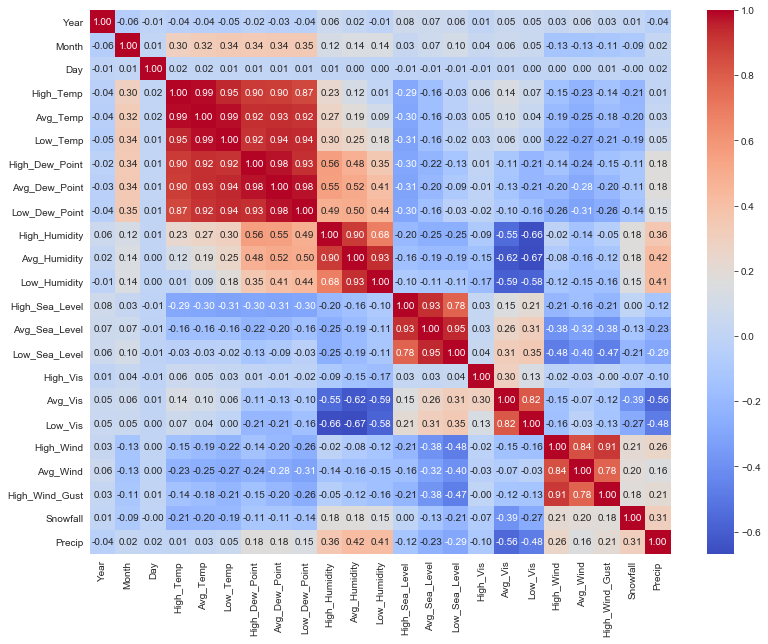

In [141]:
# Create tabular correlation matrix with data
corr_bos = wbos_df.corr('pearson')
heat_bos, ax_bos = plt.subplots(figsize=(13,10))
# Plot correlation matrix
heat_bos = sns.heatmap(corr_bos, ax=ax_bos, xticklabels=corr_bos.columns.values,yticklabels=corr_bos.columns.values, cmap='coolwarm', annot =True, fmt= '.2f')


In [143]:
corr_bos['Avg_Temp']

Year             -0.043367
Month             0.323805
Day               0.015950
High_Temp         0.987497
Avg_Temp          1.000000
Low_Temp          0.985208
High_Dew_Point    0.921902
Avg_Dew_Point     0.929951
Low_Dew_Point     0.915533
High_Humidity     0.268355
Avg_Humidity      0.185616
Low_Humidity      0.092774
High_Sea_Level   -0.301723
Avg_Sea_Level    -0.163093
Low_Sea_Level    -0.029493
High_Vis          0.045291
Avg_Vis           0.102805
Low_Vis           0.035983
High_Wind        -0.189130
Avg_Wind         -0.248580
High_Wind_Gust   -0.178669
Snowfall         -0.203031
Precip            0.029269
Name: Avg_Temp, dtype: float64

In [148]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
weather_model = ols('Avg_Temp ~ Avg_Dew_Point',data=wbos_df).fit()
# summarize our model
weather_model_summary = weather_model.summary()
# convert our table to HTML and add colors to headers for explanatory purposes
# THIS HTML CODE IS A STYLISTIC CHOICE NOT A NECESSITY
HTML(
(weather_model_summary
 .as_html()
 .replace('<th> Adj. R-squared: </th>', '<thstyle="background-color:#aec7e8;"> Adj. R-squared: </th>')
 .replace('<th>coef</th>', '<th style="backgroundcolor:#ffbb78;">coef</th>')
 .replace('<th>std err</th>', '<th style="backgroundcolor:#c7e9c0;">std err</th>')
 .replace('<th>P>|t|</th>', '<th style="backgroundcolor:#bcbddc;">P>|t|</th>')
 .replace('<th>[0.025</th> <th>0.975]</th>', '<thstyle="background-color:#ff9896;">[0.025</th> <thstyle="background-color:#ff9896;">0.975]</th>'))
)


In [150]:
# ols method is a part of statsmodel library, remember to import
#all libraries prior to running this code
weather_model_multi = ols("""Avg_Temp ~ Avg_Dew_Point + Avg_Wind + Snowfall + Avg_Humidity + Month""",data=wbos_df).fit()
# summarize our model
weather_model_summary_multi = weather_model_multi.summary()
HTML(weather_model_summary_multi.as_html())
